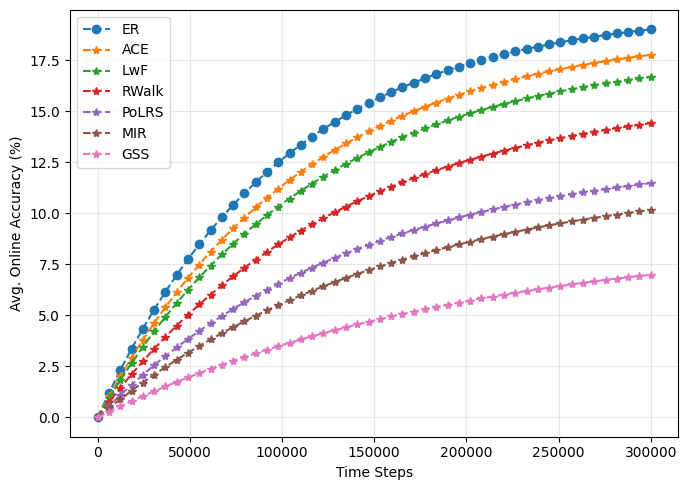

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example x-axis (time steps)
x = np.linspace(0, 300_000, 50)  # 50 points from 0 to 300k

# Example fake y data (replace with real experiment results)
er = 20 * (1 - np.exp(-x / 100_000))          # ER
ace = 19 * (1 - np.exp(-x / 110_000))         # ACE
lwf = 18 * (1 - np.exp(-x / 115_000))         # LwF
rwalk = 16 * (1 - np.exp(-x / 130_000))       # RWalk
polrs = 13 * (1 - np.exp(-x / 140_000))       # PoLRS
mir = 12 * (1 - np.exp(-x / 160_000))         # MIR
gss = 9 * (1 - np.exp(-x / 200_000))          # GSS

# Plotting
plt.figure(figsize=(7,5))

plt.plot(x, er, 'o--', label="ER")
plt.plot(x, ace, '*--', label="ACE")
plt.plot(x, lwf, '*--', label="LwF")
plt.plot(x, rwalk, '*--', label="RWalk")
plt.plot(x, polrs, '*--', label="PoLRS")
plt.plot(x, mir, '*--', label="MIR")
plt.plot(x, gss, '*--', label="GSS")

plt.xlabel("Time Steps")
plt.ylabel("Avg. Online Accuracy (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

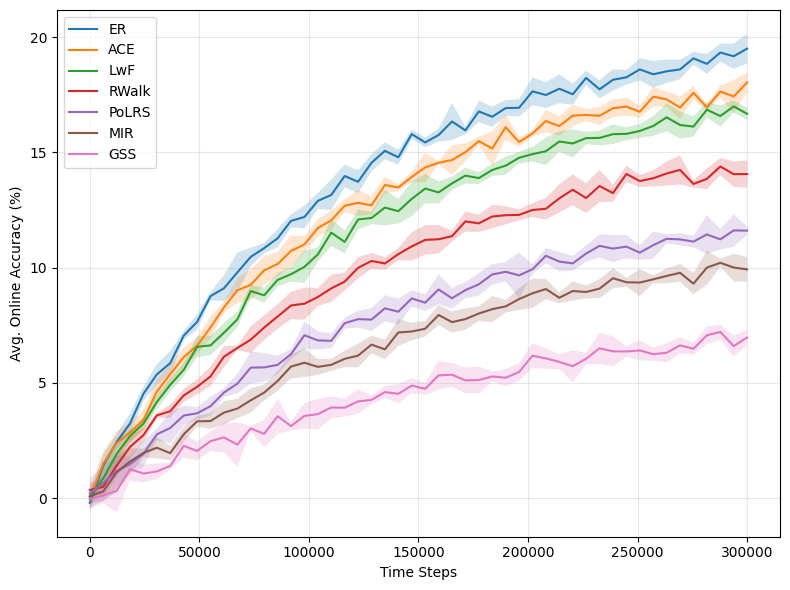

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example x-axis (time steps)
x = np.linspace(0, 300_000, 50)  # 50 points from 0 to 300k

# Simulate multiple runs for each method (replace with your real data shape: [runs, steps])
def simulate_runs(base_curve, n_runs=5, noise_scale=0.5):
    return np.array([base_curve + np.random.normal(0, noise_scale, size=base_curve.shape)
                     for _ in range(n_runs)])

er_runs = simulate_runs(20 * (1 - np.exp(-x / 100_000)))
ace_runs = simulate_runs(19 * (1 - np.exp(-x / 110_000)))
lwf_runs = simulate_runs(18 * (1 - np.exp(-x / 115_000)))
rwalk_runs = simulate_runs(16 * (1 - np.exp(-x / 130_000)))
polrs_runs = simulate_runs(13 * (1 - np.exp(-x / 140_000)))
mir_runs = simulate_runs(12 * (1 - np.exp(-x / 160_000)))
gss_runs = simulate_runs(9 * (1 - np.exp(-x / 200_000)))

methods = {
    "ER": er_runs,
    "ACE": ace_runs,
    "LwF": lwf_runs,
    "RWalk": rwalk_runs,
    "PoLRS": polrs_runs,
    "MIR": mir_runs,
    "GSS": gss_runs,
}

plt.figure(figsize=(8, 6))

for label, runs in methods.items():
    mean = runs.mean(axis=0)
    std = runs.std(axis=0)
    
    # Plot mean
    plt.plot(x, mean, label=label)
    
    # Plot variance (std shading)
    plt.fill_between(x, mean - std, mean + std, alpha=0.2)

plt.xlabel("Time Steps")
plt.ylabel("Avg. Online Accuracy (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
